# EXERCISES 10-10-23



## Exercise 4.1
Write a function that implements the linear congruential generator for pseudo-random numbers, using these parameters:

M = 2147483647
A = 214013
C = 2531011


In [14]:
from time import time
seed = int(time())
x = seed

def randint(M,C,A):
  global x
  x = (A*x+C)%M
  return x

for i in range(0,5):
  print(randint(M = 2147483647,A = 214013,C = 2531011))

95049290
821127397
1205827515
1804122363
966975012


# Exercise 4.2

To be solved after lecture 5 Implement the generator in the form of an object, which contains a method for generating a random number and a method for setting the generation seed, using an appropriate variable of the class to store this information.

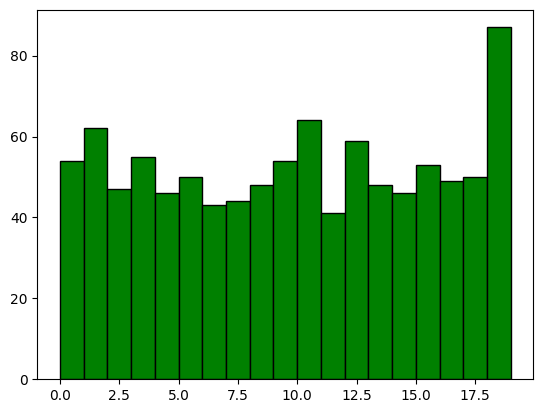

In [15]:
from time import time
import matplotlib.pyplot as plt 

class myRandom:
  def __init__(self,A,C,M, seed = int(time())):
    self.seed = seed
    self.A = A
    self.C = C
    self.M = M
    self.x = seed

  def next(self):
    self.x = (self.A*self.x+self.C)%self.M
    return self.x

  def nextInt(self,min,max):
    return self.next()%(max-min)+min

  def set_seed(self,seed):
    self.seed = seed
    self.x = seed


### Testing

r = myRandom(M = 2147483647,A = 214013,C = 2531011)
nums = []
for _ in range(0,1000):
  nums.append(r.nextInt(0,20))

plt.hist(nums,bins=range(0,20),edgecolor='black',color='green')
plt.show()


## Exercises 4.3
Show that initializing the seed of a pseudo-random integer generator is equivalent to looking into a sequence of pseudo-random numbers at any point.

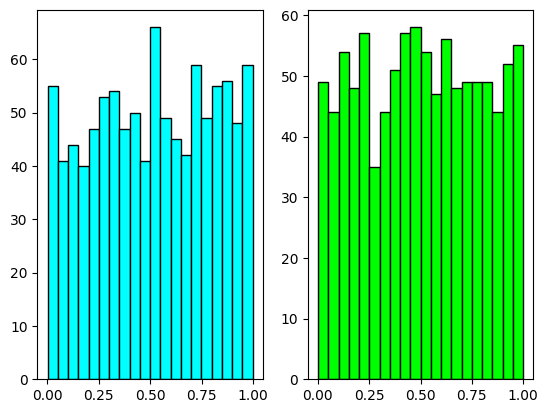

In [16]:
import random

random.seed(1)
a = [random.random() for _ in range(1000)]

random.seed(2)
b = [random.random() for _ in range(1000)]

fig, ax = plt.subplots (nrows = 1, ncols = 2)
ax[0].hist(a,bins=20,edgecolor='black',color='aqua')
ax[1].hist(b,bins=20,edgecolor='black',color='lime')
plt.show()


#Exercises 4.4
Implement a pseudo-random number generator according to a uniform distribution between two arbitrary endpoints.

    Use the matplotlib library to visualize the distribution of the generated numbers.


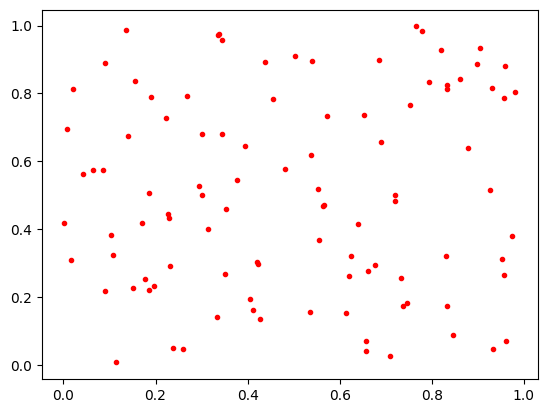

In [17]:
from random import random
from matplotlib import pyplot as plt

X = [random() for _ in range(100)]
Y = [random() for _ in range(100)]
plt.plot(X,Y,'o',color='red',markersize=3)
plt.show()

## Exercise 4.5
Implement a pseudo-random number generator that uses the try-and-catch method to generate pseudo-random numbers according to an arbitrary probability distribution.

    Take the probability density function (pdf) as an input parameter for generating random numbers.

    Use the matplotlib library to visualize the distribution of the generated numbers.


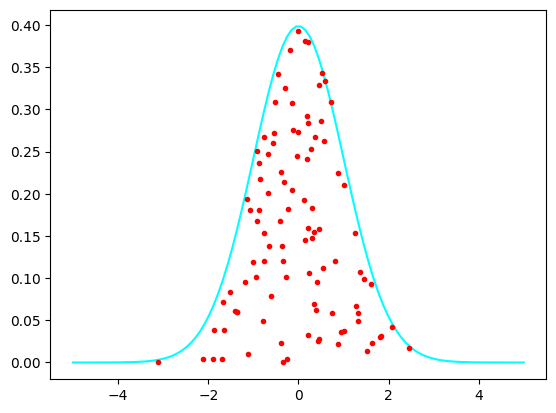

In [18]:
from random import random
from matplotlib import pyplot as plt
from scipy.stats import norm
import numpy as np

x = np.linspace(-5,5,100)
norm_fix = norm (0, 1)

def rand_range(min,max):
  return random()*(max-min)+min

def rand_TAC (f, xMin, xMax, yMax) :
    x = rand_range (xMin, xMax)
    y = rand_range (0, yMax)
    while (y > f(x)) :
        x = rand_range (xMin, xMax)
        y = rand_range (0, yMax)
    return (x,y)

points = [rand_TAC(lambda x: norm.pdf(x,loc=0,scale=1),-5,5,1) for _ in range(0,100)]

fig, ax = plt.subplots (nrows = 1, ncols = 1)
ax.plot(x,norm_fix.pdf(x), color ='aqua')
ax.plot(*zip(*points),'o',color='red',markersize=3)
plt.show()



## Exercise 4.6
Implement a pseudo-random number generator that uses the inverse function method to generate events distributed according to an exponential probability distribution.

    Use the matplotlib library to visualize the distribution of the generated numbers.
$F(x) = 1-e^{-\lambda x}$

$F^{-1}(x) = -\frac{\log(1-y)}{\lambda}$

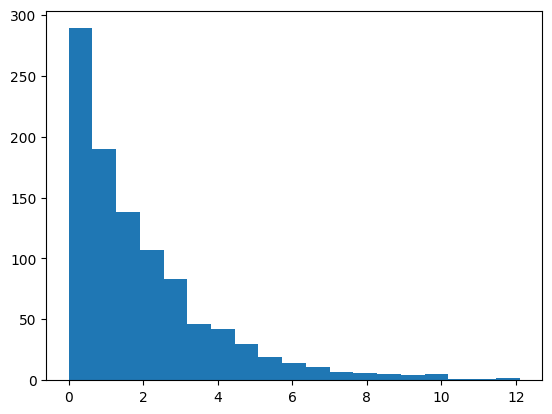

In [19]:
# lambda = 1


def exponential_random(l=1):
  y = random()
  return -np.log(1-y)/l

x = [exponential_random(0.5) for _ in range(1000)]
plt.hist(x,bins=np.linspace(min(x),max(x),20))
plt.show()

## Exercise 4.7
Implement a pseudo-random number generator that uses the central limit theorem method to generate events distributed according to a Gaussian probability distribution.

    How can you obtain a normal distribution, i.e., a Gaussian distribution centered at zero with unit variance?

    Visually verify that as the number of events increases, the similarity between the obtained distribution and the Gaussian functional form increases, both graphically and by using the moments of the distributions calculated on the generated event sample.


2.611197246931016 0.7959832919971243 0.6335894011385792


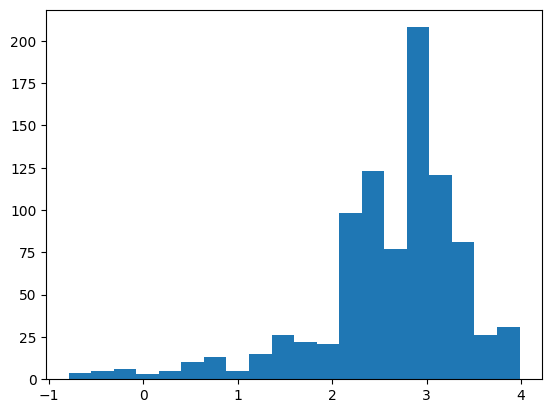

In [20]:
from random import random
import numpy as np

variance = 1*100
mean = 3
N = 1000
values = []
means = []

for _ in range(0,N):
  values.append((random()-0.5)*variance+mean)
  means.append(np.average(values))

means = means[int(N*0.1):] # non ha senso fare una media su meno di una decina di valori
print(np.mean(means),np.std(means),np.std(means)**2)
plt.hist(means,bins=20)
plt.show()

## Exercise 4.8
To be solved after lecuture 4 Implement an object named stats, which calculates the statistics associated with a sample of numbers stored in a Python list.

    What different design options are possible for this object?

    What variables need to be added to the class to ensure its functionality?

    What values should these variables have during initialization?


In [21]:
class StatsUniform:
  def __init__(self,X):
    self.X = X
    self.mean = (max(X)-min(X))/2
    self.std = (max(X)-min(X))/np.sqrt(12)
    self.var = self.std**2
  def __repr__(self):
    return (f"""
mean: {self.mean}
std: {self.std}
variance: {self.var}
    """)

## Exercise 4.9

To be solved after lecuture 4 Test the stats object with each of the implemented generation algorithms. In particular, then:

    Verify that the value of the variance for the uniform distribution corresponds to expectations (what is the uncertainty associated with the obtained number?)

    Verify that the value of the variance obtained using the central limit theorem technique corresponds to the expected one.


In [22]:
r_array = np.random.rand(5,1000)

r = [StatsUniform(i) for i in r_array]

expected_variance = 1/12
mean_variance = np.mean(list(map(lambda x: x.var,r)))

print(f"Expected variance: {expected_variance}, mean_variance: {mean_variance}")



Expected variance: 0.08333333333333333, mean_variance: 0.08315938185592453
